In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv("/content/train.csv.zip")

In [ ]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
median_age = train_df['Age'].median()
train_df['Age'].fillna(median_age, inplace=True)

In [ ]:
mode_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(mode_embarked, inplace=True)

In [ ]:
train_df.drop(columns=['Cabin'], inplace=True)

In [ ]:
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


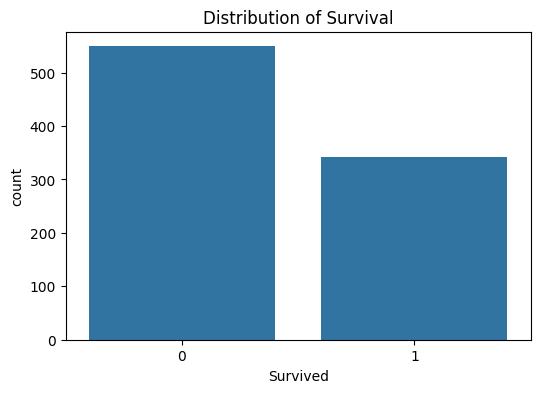

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survival')
plt.show()

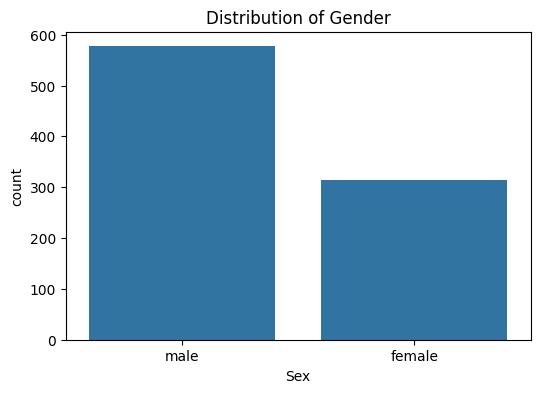

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=train_df)
plt.title('Distribution of Gender')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = train_df[['Sex']]
y = train_df['Survived']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ada_classifier = AdaBoostClassifier()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

In [ ]:
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]})

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}


In [ ]:
best_ada_classifier = AdaBoostClassifier(**best_params)
best_ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.01)

In [ ]:
y_pred = best_ada_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7821229050279329
